In [2]:
#Load packages
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

csvpath = "../InputData/GamingStudy_data.csv"
health_df_complete = pd.read_csv(csvpath, encoding = 'latin1')

health_df_complete.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [3]:
#get info from dataset
health_df_complete.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [4]:
health_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [5]:
del health_df_complete["highestleague"]

In [12]:
health_df_complete["Hours"].value_counts()

20.0     2293
10.0     1375
30.0     1186
15.0     1115
25.0      831
         ... 
33.0        1
110.0       1
85.0        1
96.0        1
87.0        1
Name: Hours, Length: 84, dtype: int64

In [7]:
#new data frame with only columns I want to keep
#GAD: General Anxiety Disorder
#SWL: Satisfaction with Life
#SPIN: Social Phobia Inventory
health_df = health_df_complete[["Game","Hours", "Narcissism", "Gender", "Age", "Work", "Degree", "Residence", "GAD_T", "SWL_T", "SPIN_T"]]
health_df.head()


,Game,Hours,Narcissism,Gender,Age,Work,Degree,Residence,GAD_T,SWL_T,SPIN_T
0,Skyrim,15.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,1,23,5.0
1,Other,8.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,8,16,33.0
2,Other,0.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,8,17,31.0
3,Other,20.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,0,17,11.0
4,Other,20.0,1.0,Male,19,Employed,High school diploma (or equivalent),South Korea,14,14,13.0


In [8]:
#See how many responses are in each column
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        13464 non-null  object 
 1   Hours       13434 non-null  float64
 2   Narcissism  13441 non-null  float64
 3   Gender      13464 non-null  object 
 4   Age         13464 non-null  int64  
 5   Work        13426 non-null  object 
 6   Degree      13464 non-null  object 
 7   Residence   13464 non-null  object 
 8   GAD_T       13464 non-null  int64  
 9   SWL_T       13464 non-null  int64  
 10  SPIN_T      12814 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ MB


In [9]:
#Drop all NA 
VG_health_df = health_df.dropna(how='any')

VG_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12744 entries, 0 to 13463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        12744 non-null  object 
 1   Hours       12744 non-null  float64
 2   Narcissism  12744 non-null  float64
 3   Gender      12744 non-null  object 
 4   Age         12744 non-null  int64  
 5   Work        12744 non-null  object 
 6   Degree      12744 non-null  object 
 7   Residence   12744 non-null  object 
 8   GAD_T       12744 non-null  int64  
 9   SWL_T       12744 non-null  int64  
 10  SPIN_T      12744 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.2+ MB


In [19]:
df = VG_health_df.loc[VG_health_df["Hours"]> 168]
df


,Game,Hours,Narcissism,Gender,Age,Work,Degree,Residence,GAD_T,SWL_T,SPIN_T
3860,League of Legends,8000.0,5.0,Other,18,Unemployed / between jobs,"Ph.D., Psy. D., MD (or equivalent)",Unknown,2,12,68.0
9435,Other,420.0,1.0,Other,42,Employed,"Ph.D., Psy. D., MD (or equivalent)",Unknown,0,5,0.0


In [20]:
cleanedVG_health_df=VG_health_df.drop(df.index)

cleanedVG_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12742 entries, 0 to 13463
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        12742 non-null  object 
 1   Hours       12742 non-null  float64
 2   Narcissism  12742 non-null  float64
 3   Gender      12742 non-null  object 
 4   Age         12742 non-null  int64  
 5   Work        12742 non-null  object 
 6   Degree      12742 non-null  object 
 7   Residence   12742 non-null  object 
 8   GAD_T       12742 non-null  int64  
 9   SWL_T       12742 non-null  int64  
 10  SPIN_T      12742 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.2+ MB


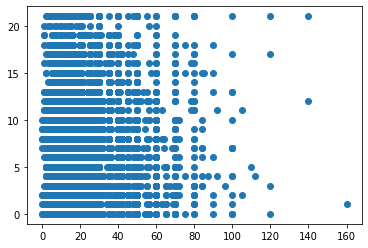

In [24]:
hours= (cleanedVG_health_df["Hours"])
GAD=(cleanedVG_health_df["GAD_T"])
narcissism=(cleanedVG_health_df["Narcissism"])
SWL=(cleanedVG_health_df["SWL_T"])
SPIN=(cleanedVG_health_df["SPIN_T"])

plt.scatter(hours, GAD)

plt.show()

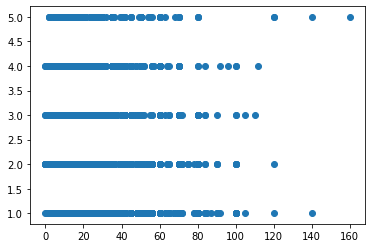

In [22]:
plt.scatter(hours, narcissism)
plt.show()

In [ ]:
plt.scatter()